# Statistiques Descriptives 2016 en en gardant que Orly

On se concentre sur l'année 2016, qui est celle pour laquelle les données sont les plus complètes. 

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
fqms_2016 = pd.read_csv("fqms_2016.csv",low_memory=False)
histo_2016 = pd.read_csv("histo_2016.csv")

In [28]:
histo_2016 = histo_2016.astype({'Jour': 'datetime64[ns]'})
fqms_2016 = fqms_2016.astype({'Date du vol': 'datetime64[ns]'})

In [29]:
histo_2016[['Plateforme code','Nombre de passagers réalisés','Sièges Corrections_ICI']].groupby('Plateforme code').count()

,Nombre de passagers réalisés,Sièges Corrections_ICI
Plateforme code,,
CDG,475702,74354
ORY,235742,77526


In [30]:
fqms_2016[['Pax Estimés']].count()

Pax Estimés    238698
dtype: int64

In [31]:
histo_2016 = histo_2016[histo_2016['Plateforme code'].isin(['ORY'])]

## Représentations graphiques du nombre de passagers journaliers

In [32]:
faisceaux = ["National","Schengen","Dom Tom","Autre UE","International"]

In [33]:
histo_depart = histo_2016[histo_2016['Type de mouvement']=="Départ"]
histo_arrivee = histo_2016[histo_2016['Type de mouvement']=="Arrivée"]

fqms_depart = fqms_2016[fqms_2016['A/D']=='A']
fqms_arrivee = fqms_2016[fqms_2016['A/D']=='D']

Text(0.5, 0.98, 'Comparaison entre nombre de passagers réalisés et estimés par jour (somme) sur chaque faisceau, en fonction du type de mouvement :')

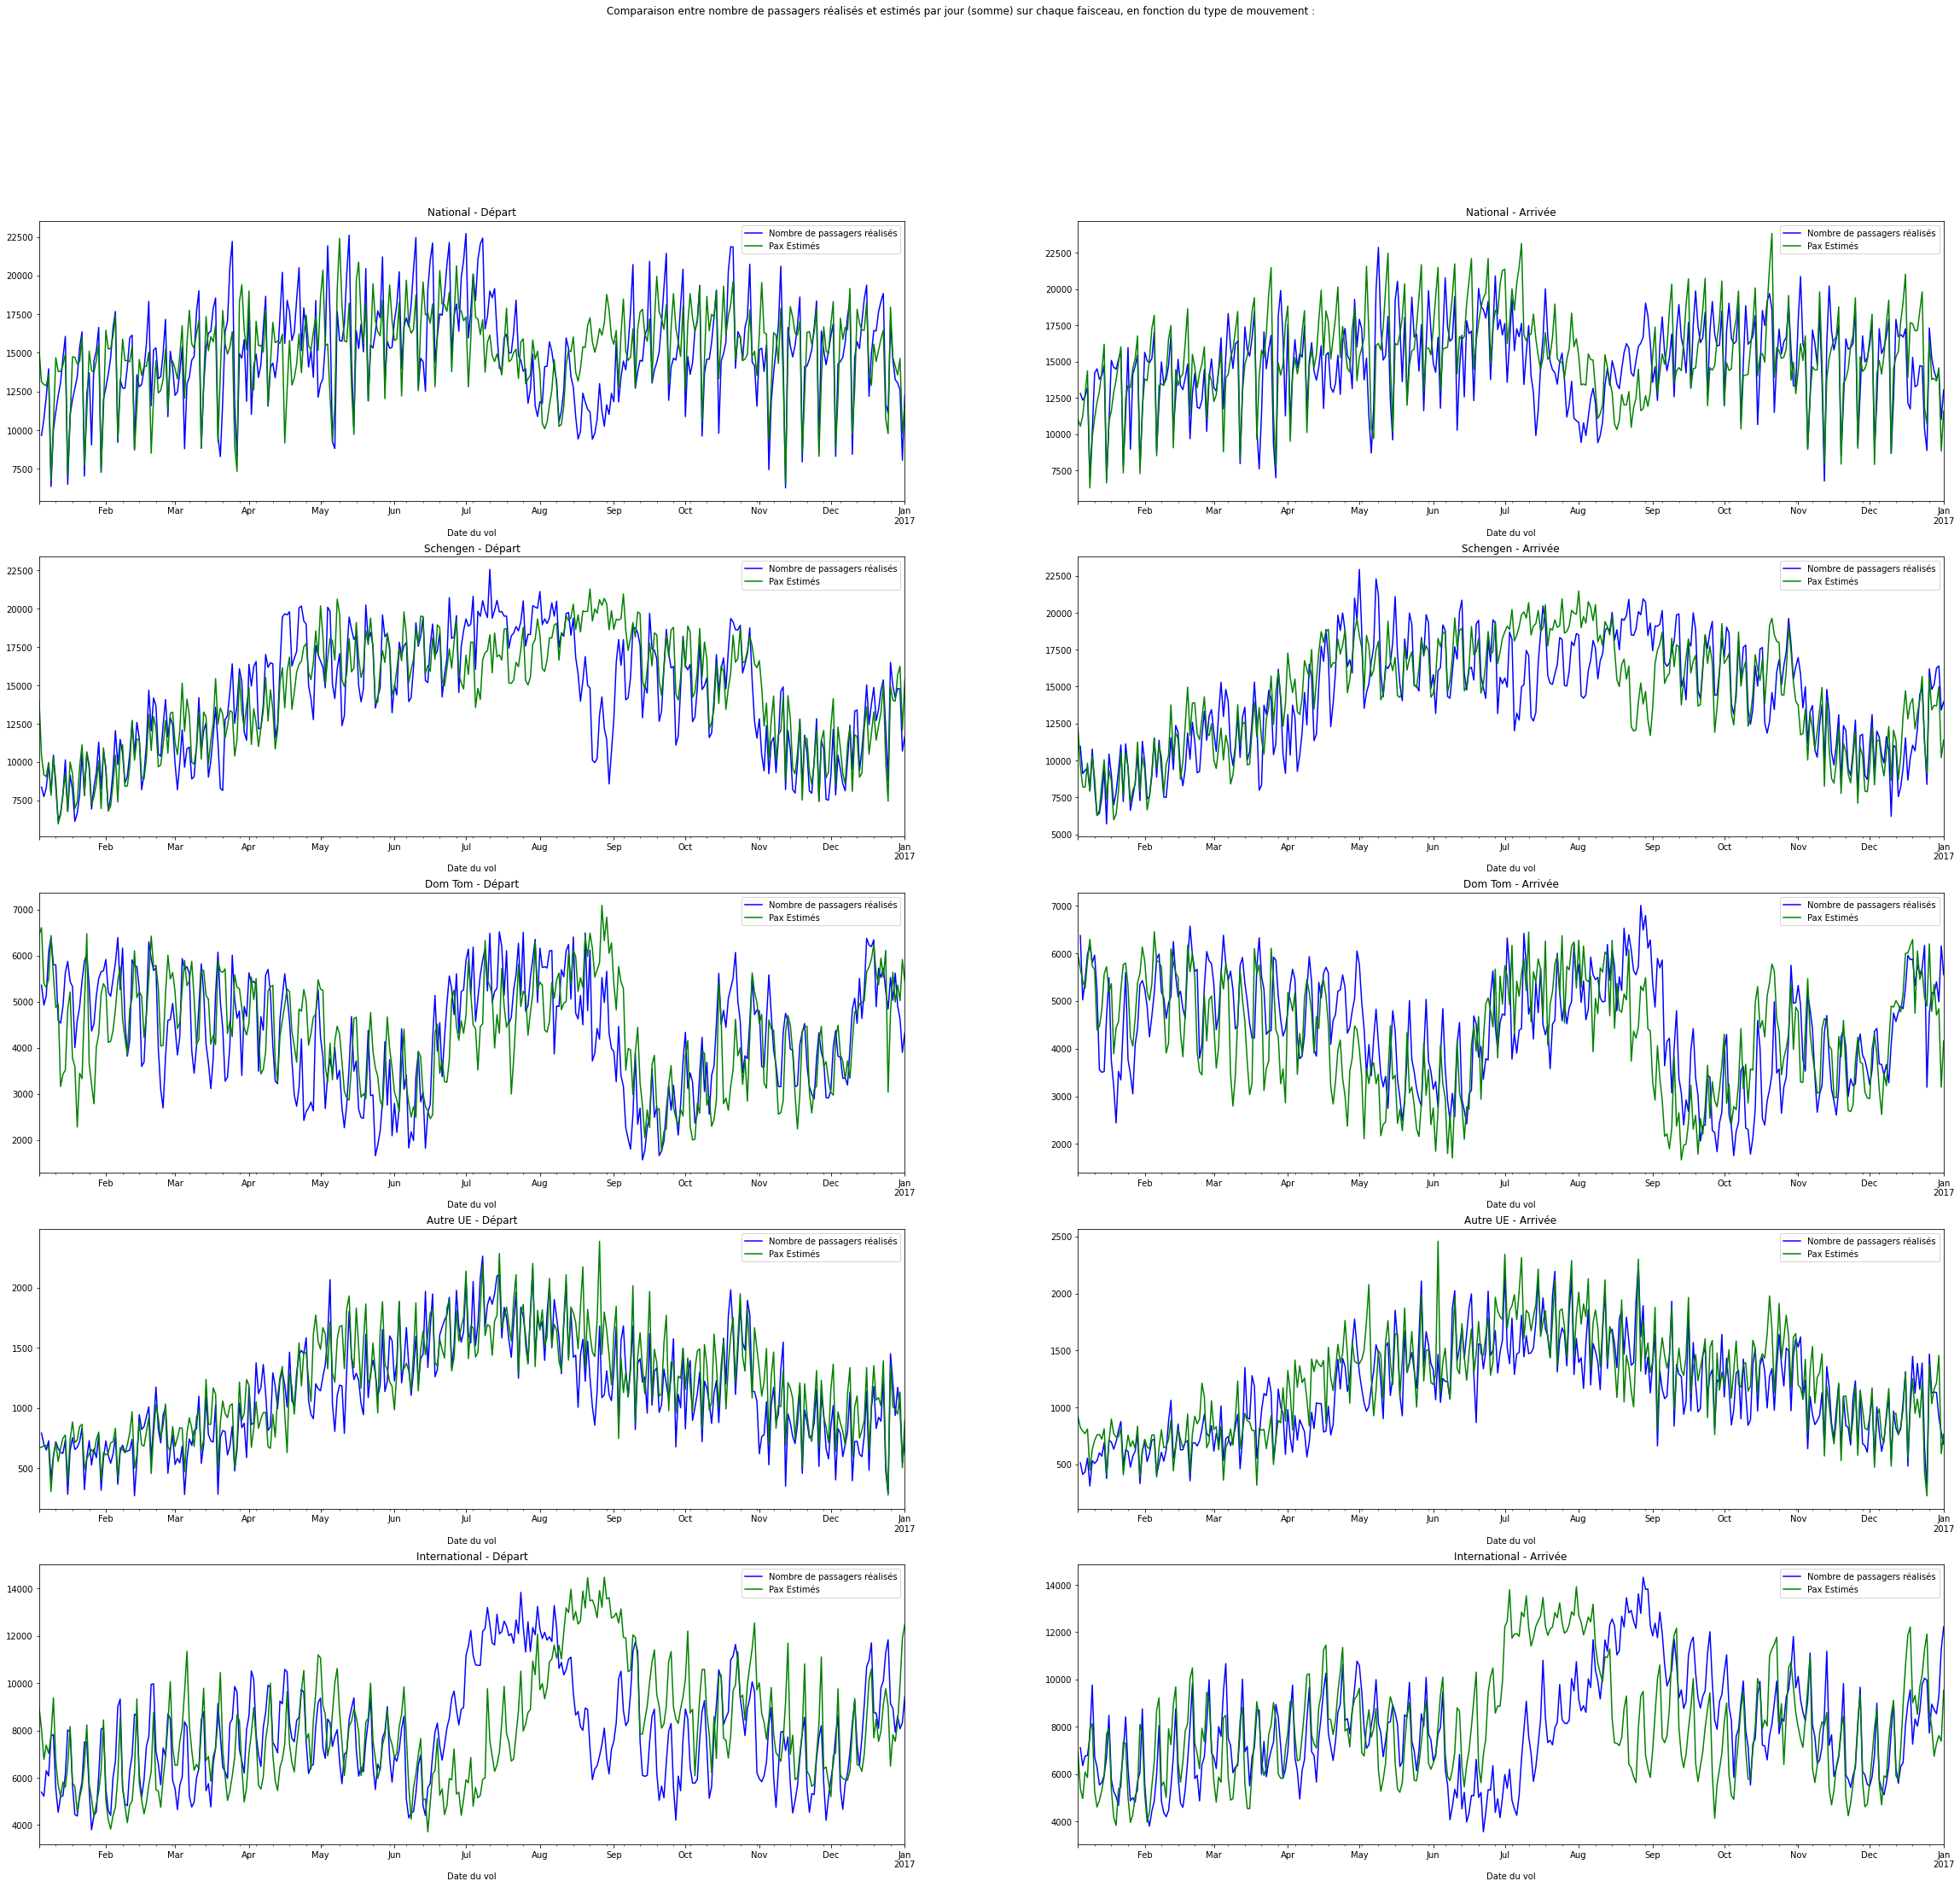

In [16]:
fig, ax = plt.subplots(5,2, figsize=(40,35))

for i in range(5) :
    ax[(i,0)].set_title(faisceaux[i]+" - Départ")
    
    histo_depart[histo_depart['Faisceau facturation'].isin([faisceaux[i]])].groupby('Jour').agg({'Nombre de passagers réalisés':'sum'}).plot(ax = ax[(i,0)],legend=True, subplots=True,color='blue')
    fqms_depart[fqms_depart['Faisceau'].isin([i+1])].groupby('Date du vol').agg({'Pax Estimés':'sum'}).plot(ax = ax[(i,0)],legend=True, subplots=True,color='green')
    
    ax[(i,1)].set_title(faisceaux[i]+" - Arrivée")
    
    histo_arrivee[histo_arrivee['Faisceau facturation'].isin([faisceaux[i]])].groupby('Jour').agg({'Nombre de passagers réalisés':'sum'}).plot(ax = ax[(i,1)],legend=True, subplots=True,color='blue')
    fqms_arrivee[fqms_arrivee['Faisceau'].isin([i+1])].groupby('Date du vol').agg({'Pax Estimés':'sum'}).plot(ax = ax[(i,1)],legend=True, subplots=True,color='green')
    
fig.suptitle('Comparaison entre nombre de passagers réalisés et estimés par jour (somme) sur chaque faisceau, en fonction du type de mouvement :')

## Vérification des nombres de sièges

In [34]:
histo_2016[['Nombre de passagers réalisés','Sièges Corrections_ICI']].count()

Nombre de passagers réalisés    235742
Sièges Corrections_ICI           77526
dtype: int64

Les nombres de sièges sont incomplets, ne permettent pas de compléter toute la base...

In [36]:
base_ref = pd.read_csv("base_ref_2.csv")
base_ref.drop(['Unnamed: 0'], axis='columns', inplace=True)
base_ref.rename(columns={'Tav':'Sous-type avion'}, inplace=True)

In [40]:
histo_2016 = histo_2016.merge(base_ref,how='left', on=['Sous-type avion'])

In [41]:
histo_2016[['Nombre de passagers réalisés','Sièges Corrections_ICI_y']].count()

Nombre de passagers réalisés    235742
Sièges Corrections_ICI_y        234722
dtype: int64

#### Faire la jointure sur les sous-type avion et pas avion permet de compléter les nombres de sièges !

In [43]:
histo_2016['Dif. sièges - passagers']=histo_2016['Sièges Corrections_ICI_y']-histo_2016['Nombre de passagers réalisés']

Text(0.5, 0.98, 'Répartition des différences entre nombre de sièges estimés et passagers réalisés (pour les valeurs renseignées)')

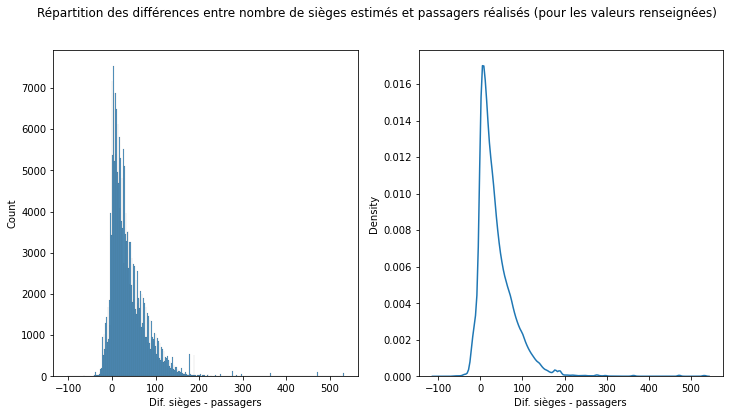

In [44]:
fig,ax = plt.subplots(1, 2, figsize=(12,6)) 

sns.histplot(data=histo_2016,x='Dif. sièges - passagers',ax=ax[0])
sns.kdeplot(data=histo_2016,x='Dif. sièges - passagers',ax=ax[1])

fig.suptitle("Répartition des différences entre nombre de sièges estimés et passagers réalisés (pour les valeurs renseignées)")

#### Cela permet la correction des erreurs

# Représentation graphique des LF%

In [46]:
histo_2016['LF% réalisé'] = histo_2016['Nombre de passagers réalisés']/histo_2016['Sièges Corrections_ICI_y']

In [47]:
histo_depart2 = histo_2016[histo_2016['Type de mouvement']=="Départ"]
histo_arrivee2 = histo_2016[histo_2016['Type de mouvement']=="Arrivée"]

fqms_depart2 = fqms_2016[fqms_2016['A/D']=='A']
fqms_arrivee2 = fqms_2016[fqms_2016['A/D']=='D']

Text(0.5, 0.98, 'Comparaison des taux de remplissage moyens par jour sur chaque faisceau, en fonction du type de mouvement :')

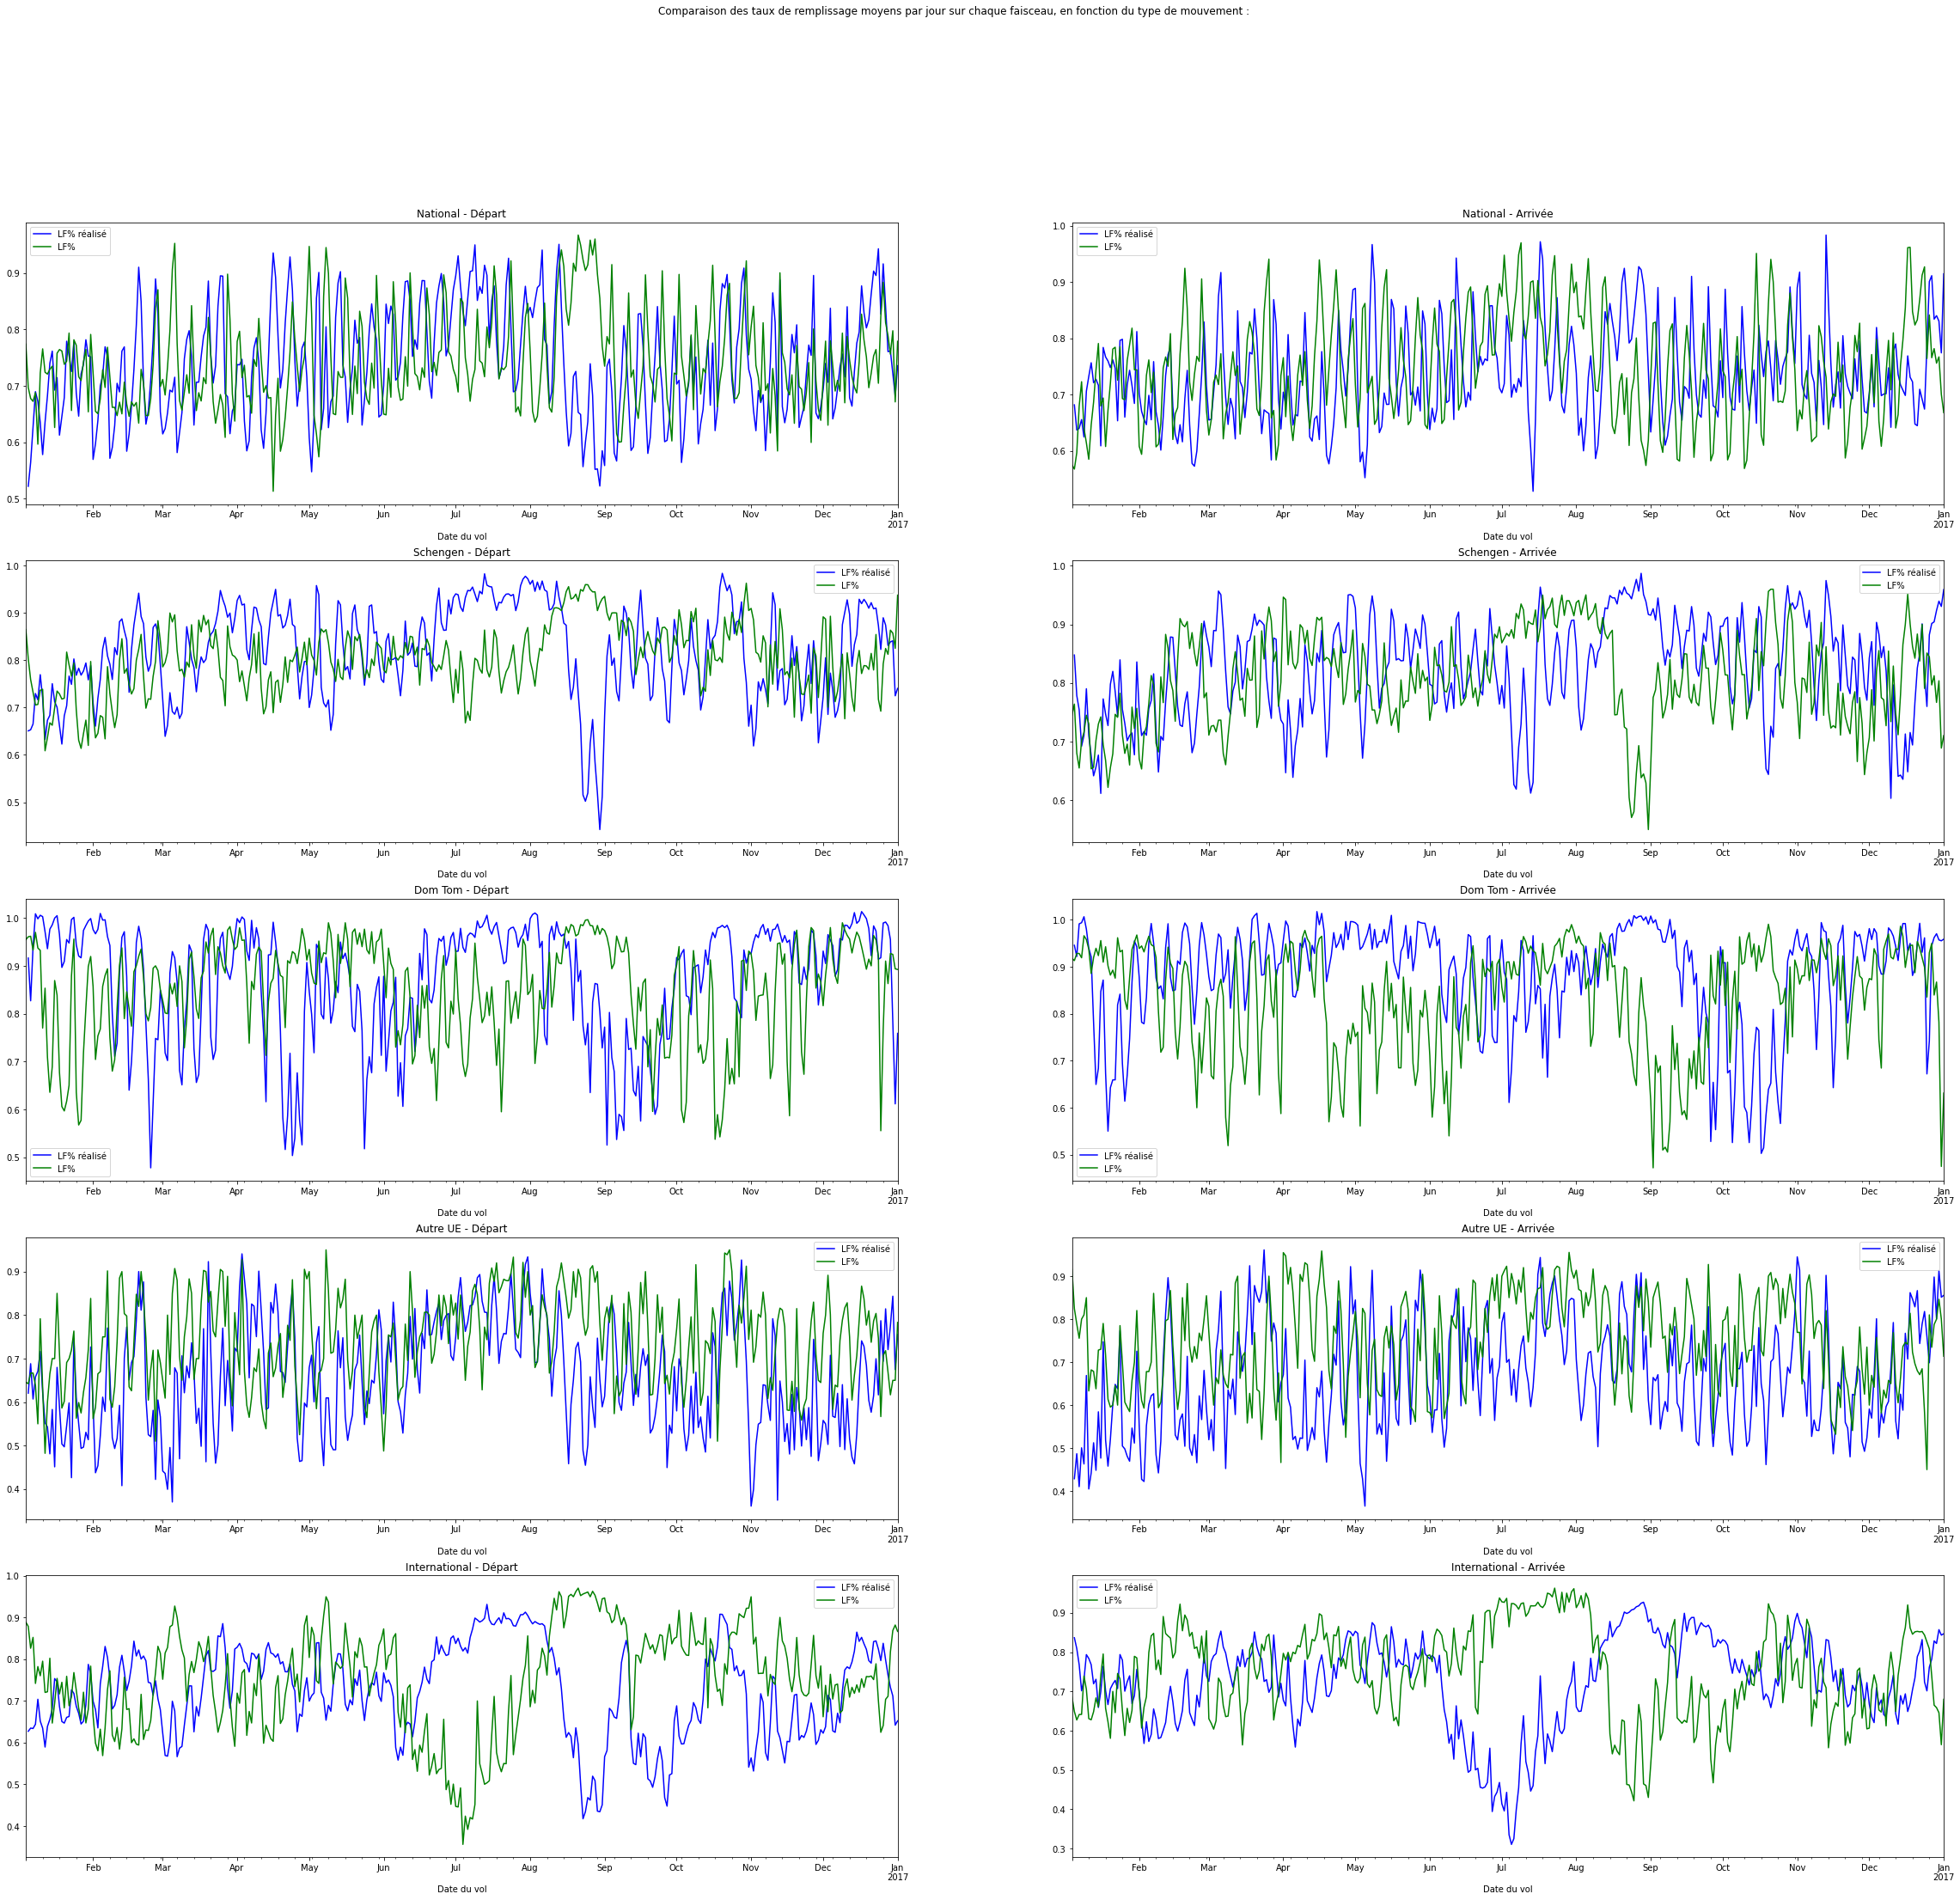

In [49]:
fig, ax = plt.subplots(5,2, figsize=(40,35))

for i in range(5) :
    ax[(i,0)].set_title(faisceaux[i]+" - Départ")
    
    histo_depart2[histo_depart2['Faisceau facturation'].isin([faisceaux[i]])].groupby('Jour').agg({'LF% réalisé':'mean'}).plot(ax = ax[(i,0)],legend=True, subplots=True,color='blue')
    fqms_depart2[fqms_depart2['Faisceau'].isin([i+1])].groupby('Date du vol').agg({'LF%':'mean'}).plot(ax = ax[(i,0)],legend=True, subplots=True,color='green')
    
    ax[(i,1)].set_title(faisceaux[i]+" - Arrivée")
    
    histo_arrivee2[histo_arrivee2['Faisceau facturation'].isin([faisceaux[i]])].groupby('Jour').agg({'LF% réalisé':'mean'}).plot(ax = ax[(i,1)],legend=True, subplots=True,color='blue')
    fqms_arrivee2[fqms_arrivee2['Faisceau'].isin([i+1])].groupby('Date du vol').agg({'LF%':'mean'}).plot(ax = ax[(i,1)],legend=True, subplots=True,color='green')
    
fig.suptitle('Comparaison des taux de remplissage moyens par jour sur chaque faisceau, en fonction du type de mouvement :')